# Practica 3 - Red aleatoria y camino mas corto
## Objetivo
El objetivo principal de esta práctica es implementar una función en python que genere una red aleatoria no dirigida. La función tendrá como argumentos de entrada:

- N: número de nodos

- P: probabilidad de que el par de nodos (i,j) tenga un enlace

Y como salida:

- Un objeto Graph con la red correspondiente
- El algoritmo de construcción de la red es el siguiente: 
- Construir una red no dirigida de N nodos y enlaces aleatorios tales que la probabilidad de que un enlace una dos nodos cualesquiera (i,j) sea igual a P para todo los pares de nodos (i.e. para cada par de nodos generamos un número aleatorio entre [0,1] y si es menor que la probabilidad P creamos el enlace). No se permiten enlaces múltiples.

Una vez implementada la función:

- Para una red generada con N=100 y P=0.01:

    - Mostrar gráficamente la matriz de adyacencia (ver función matshow en ayuda).
    - Calcular el número de enlaces; comparar este valor con el valor esperado del número de enlaces.
    - Calcular el grado medio de la red.
    - Visualizar la red utilizando un layout circular
- Para una red generada con N=100 y P=0.1:
    - Calcular el número de enlaces; comparar este valor con el valor esperado del número de enlaces.
    - Calcular el grado medio de la red.
    - Calcular el camino más corto entre un par de nodos U y V (variables libremente escogidas por uno mismo)
    - Visualizar la red y el camino más corto calculado anteriormente


In [1]:
#Imports necesarios
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
#Funcion de generacion de la red
def net_generator(N,P):

    #Objeto grafo
    G = nx.Graph()

    #Agregamos nodos
    G.add_nodes_from(range(N))

    #Agragamos enlaces
    for i in range(N):
        for j in range(i+1,N):
            if np.random.rand() < P:
                G.add_edge(i,j)
    
    return G


### Para la red N = 100 y P = 0.01

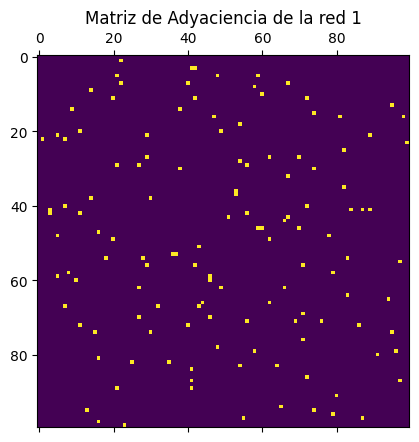

In [3]:
#Generamos la red
red1 = net_generator(100,0.01)

#Mostramos matriz de adyacencia
matriz_adyacencia = nx.adjacency_matrix(red1)
plt.matshow(matriz_adyacencia.todense())
plt.title("Matriz de Adyaciencia de la red 1")
plt.show()

In [4]:
#Calculamos el numero de enlaces y comparamos con el esperado
n_enlaces = red1.number_of_edges()

#Enlaces esperados -> N(N-1)/2 * P
enlaces_esperados = 0.5 * 100 * (100-1) * 0.01
enlaces_esperados = round(enlaces_esperados)

#Calculamos el grado medio de la red
grado_medio = np.mean([val for (node,val) in red1.degree()])

#Mostramos todo para comparar
print("El numero de enlaces es:", n_enlaces, ", mientras que el numero de enlaces esperados es:",enlaces_esperados)
print("El grado medio de la red es:", grado_medio)

El numero de enlaces es: 65 , mientras que el numero de enlaces esperados es: 50
El grado medio de la red es: 1.3


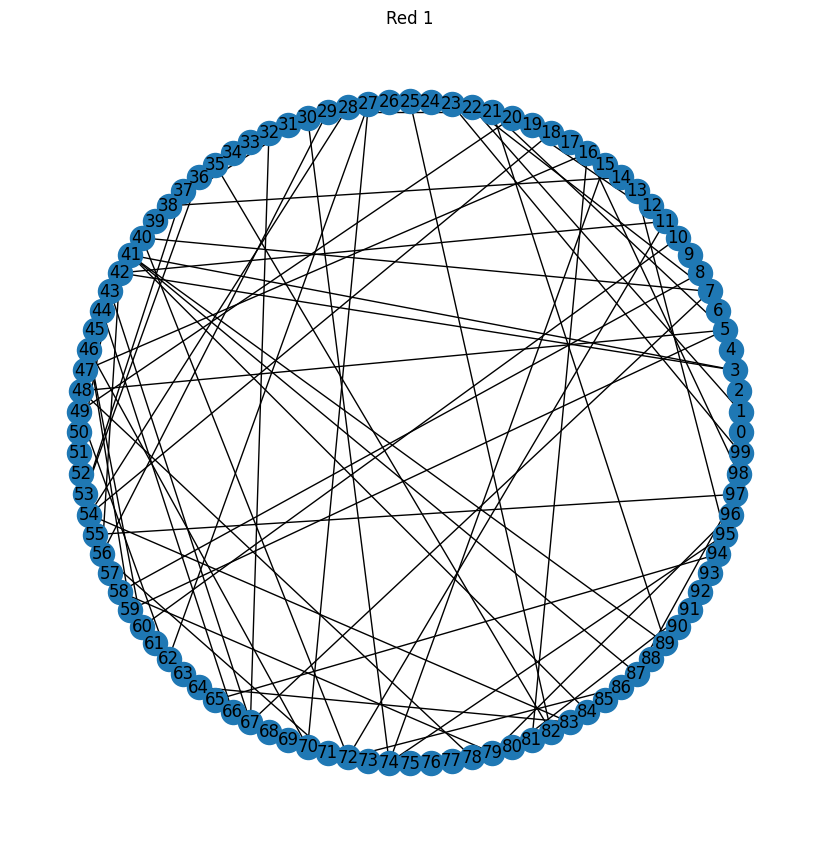

In [5]:
#Visualizamos la red utilizando un layout 
plt.figure(figsize=(8,8))
nx.draw_circular(red1, with_labels = True)
plt.title("Red 1")
plt.show()

### Para la red N = 100 y P = 0.1

In [6]:
#Generamos la segunda red
red2 = net_generator(100,0.1)

#Calculamos el numero de enlaces y comparamos con el esperado
n_enlaces2 = red2.number_of_edges()

#Enlaces esperados -> N(N-1)/2 * P
enlaces_esperados2 = 0.5 * 100 * (100-1) * 0.1
enlaces_esperados2 = round(enlaces_esperados2)

#Calculamos el grado medio de la red
grado_medio2 = np.mean([val for (node,val) in red2.degree()])

#Mostramos todo para comparar
print("El numero de enlaces es:", n_enlaces2, ", mientras que el numero de enlaces esperados es:",enlaces_esperados2)
print("El grado medio de la red es:", grado_medio2)

El numero de enlaces es: 516 , mientras que el numero de enlaces esperados es: 495
El grado medio de la red es: 10.32


In [7]:
#Calculaamos el camino mas corto entre 2 nodos
#seleccionamos los nodos aleatoriamente
nodoU = np.random.choice(red2.nodes())
#Evitamos que los dos nodos escogidos sean el mismo
while True:
    nodoV = np.random.choice(red2.nodes())
    if nodoU != nodoV:
        break

#Calculamos el camino mas corto
camino = nx.shortest_path(red2, source = nodoU, target = nodoV)

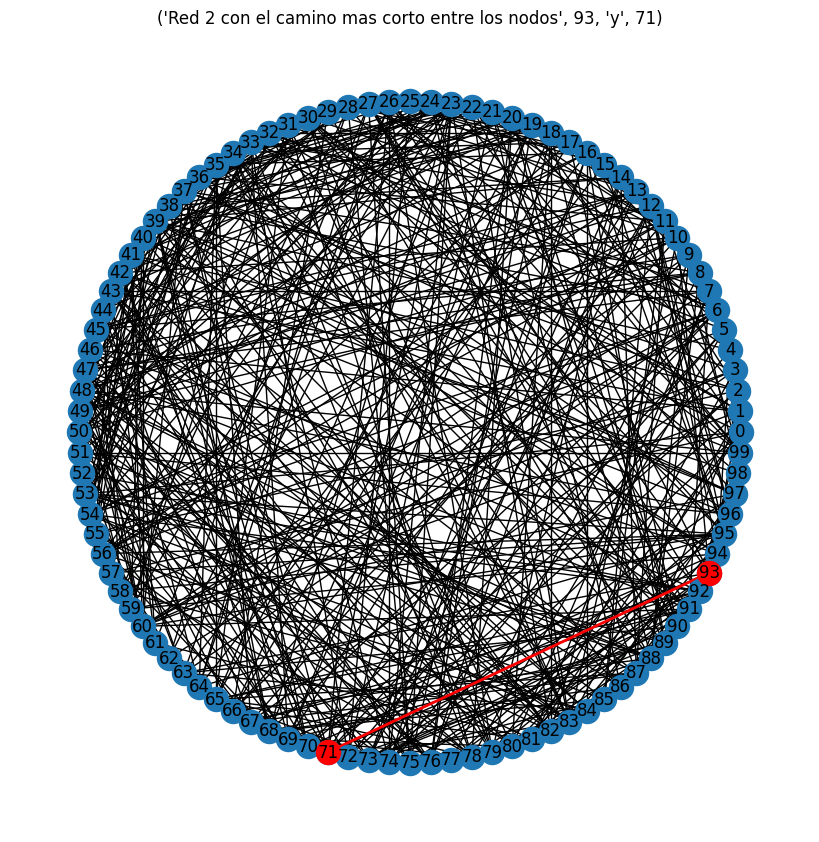

Como se aprecia en la figura, el camino mas corto esta compuesto por los siguientes nodos [93, 71]


In [8]:
#Visualizamos la red y el camino mas corto
plt.figure(figsize=(8,8))
pos = nx.circular_layout(red2)
nx.draw(red2, pos, with_labels=True)
nx.draw_networkx_nodes(red2, pos, nodelist = camino, node_color='r')
nx.draw_networkx_edges(red2, pos, edgelist =[(camino[i],camino[i+1]) for i in range(len(camino)-1)], edge_color='r', width=2)
texto = "Red 2 con el camino mas corto entre los nodos", nodoU,"y", nodoV
plt.title(texto)
plt.show()
print("Como se aprecia en la figura, el camino mas corto esta compuesto por los siguientes nodos", camino)
